#  <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">ML (SUPERVISED LEARNING)</center>

#  <center><div style="font-family: Trebuchet MS; background-color: #40E0D0; color: #2D2926; padding: 12px; line-height: 1;">ONLINE FOOD PREDICTION </center>

### DATASET:https://drive.google.com/drive/folders/1J4YJO6Sz5-Hio_8HeQMRl_XQ2kFXvTQG

**Demographic Information**:

Age: Age of the customer.

Gender: Gender of the customer.

Marital Status: Marital status of the customer.

Occupation: Occupation of the customer.

Monthly Income: Monthly income of the customer.

Educational Qualifications: Educational qualifications of the customer.

Family Size: Number of individuals in the customer's family.

**Location Information:**

Latitude: Latitude of the customer's location.

Longitude: Longitude of the customer's location.

Pin Code: Pin code of the customer's location.

**Order Details:**

Output: Current status of the order (e.g., pending, confirmed, delivered).

Feedback: Feedback provided by the customer after receiving the order.

<h1><b>Learnings:</b></h1><ol>
<li>Before the data was handled i.e biaseness was removed the accuracy was quite high after handling the data .</li>
<li>But the Prediction was biased so the imbalanced Data was handled by Using Smote .</li>
    <li>Random Forest is the most accurate model as compared to Decision Tree,SVM,XGBOOST.</li>
<li>The data is not linearly seperable thats the reason we used radial basis function (RBF) which was circularly scattered.</li>

**Future Scope:**
* Might get the Actual data from some data and try whether these are accurate or not i.e whether the model is working precisely .

In [1]:
#loading the libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.colors import ListedColormap
import plotly.express as px 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

D:\jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# loading the dataset 
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\archive\\onlinefoods.csv")
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [3]:
df.shape

(388, 13)

In [4]:
# checking for null values 
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [5]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [6]:
#checking for value counts for each column
for i, cols in enumerate(df):
    print(f'{i+1} : {df[cols].value_counts()}')
    print(f'----------------------------------------')

1 : 23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: Age, dtype: int64
----------------------------------------
2 : Male      222
Female    166
Name: Gender, dtype: int64
----------------------------------------
3 : Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64
----------------------------------------
4 : Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64
----------------------------------------
5 : No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64
----------------------------------------
6 : Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64
-----------------

In [7]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [8]:
df[["Output","Unnamed: 12"]].value_counts()

Output  Unnamed: 12
Yes     Yes            301
No      No              87
dtype: int64

In [9]:
df=df.drop(columns="Unnamed: 12")# since both the column sare exctly the same 


In [10]:
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns
char_cols = df.select_dtypes(include = ['object']).columns

In [11]:
char_cols

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Output', 'Feedback'],
      dtype='object')

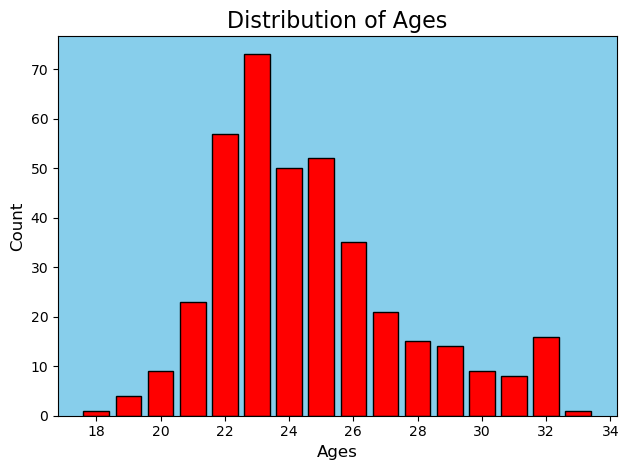

In [12]:
age_counts = df['Age'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, color='red', edgecolor='black')
plt.title('Distribution of Ages', fontsize=16)
plt.xlabel('Ages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

plt.gca().set_facecolor('skyblue')
plt.show()


Text(0, 0.5, 'Count')

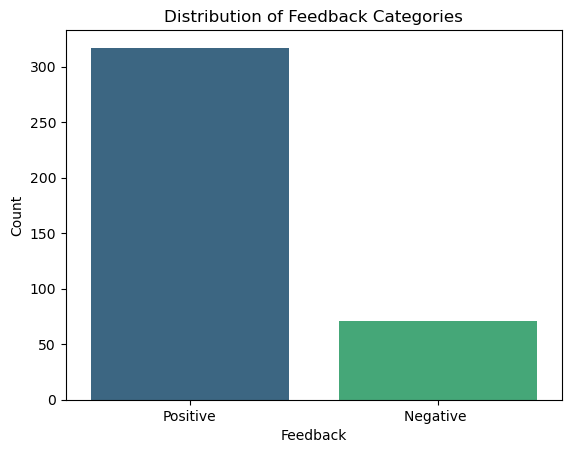

In [13]:
sns.countplot(data=df, x='Feedback', palette='viridis')
plt.title('Distribution of Feedback Categories')
plt.xlabel('Feedback')
plt.ylabel('Count')

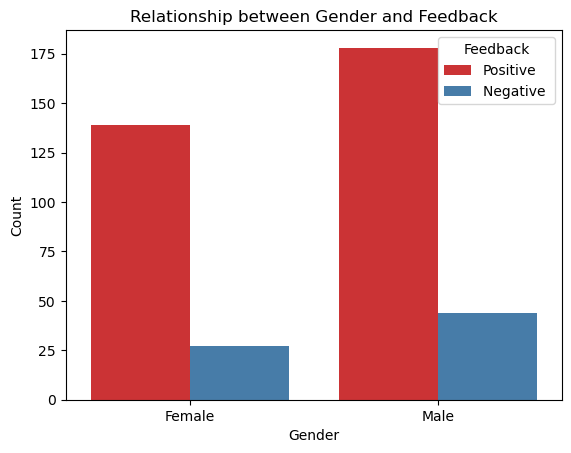

In [14]:
sns.countplot(data=df, x='Gender', hue='Feedback', palette='Set1')
plt.title('Relationship between Gender and Feedback')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

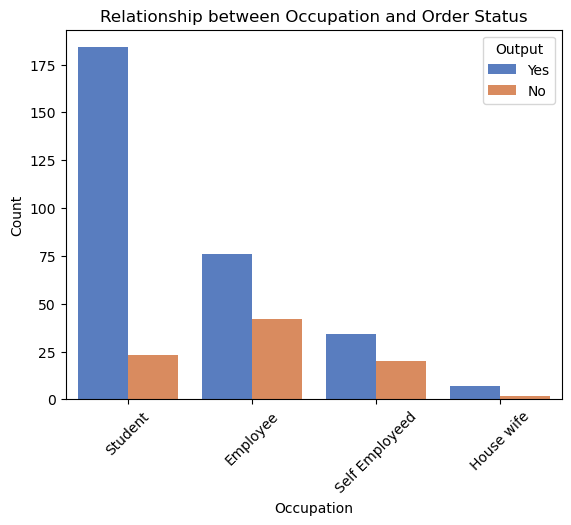

In [15]:
sns.countplot(data=df, x='Occupation', hue='Output', palette='muted')
plt.title('Relationship between Occupation and Order Status')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

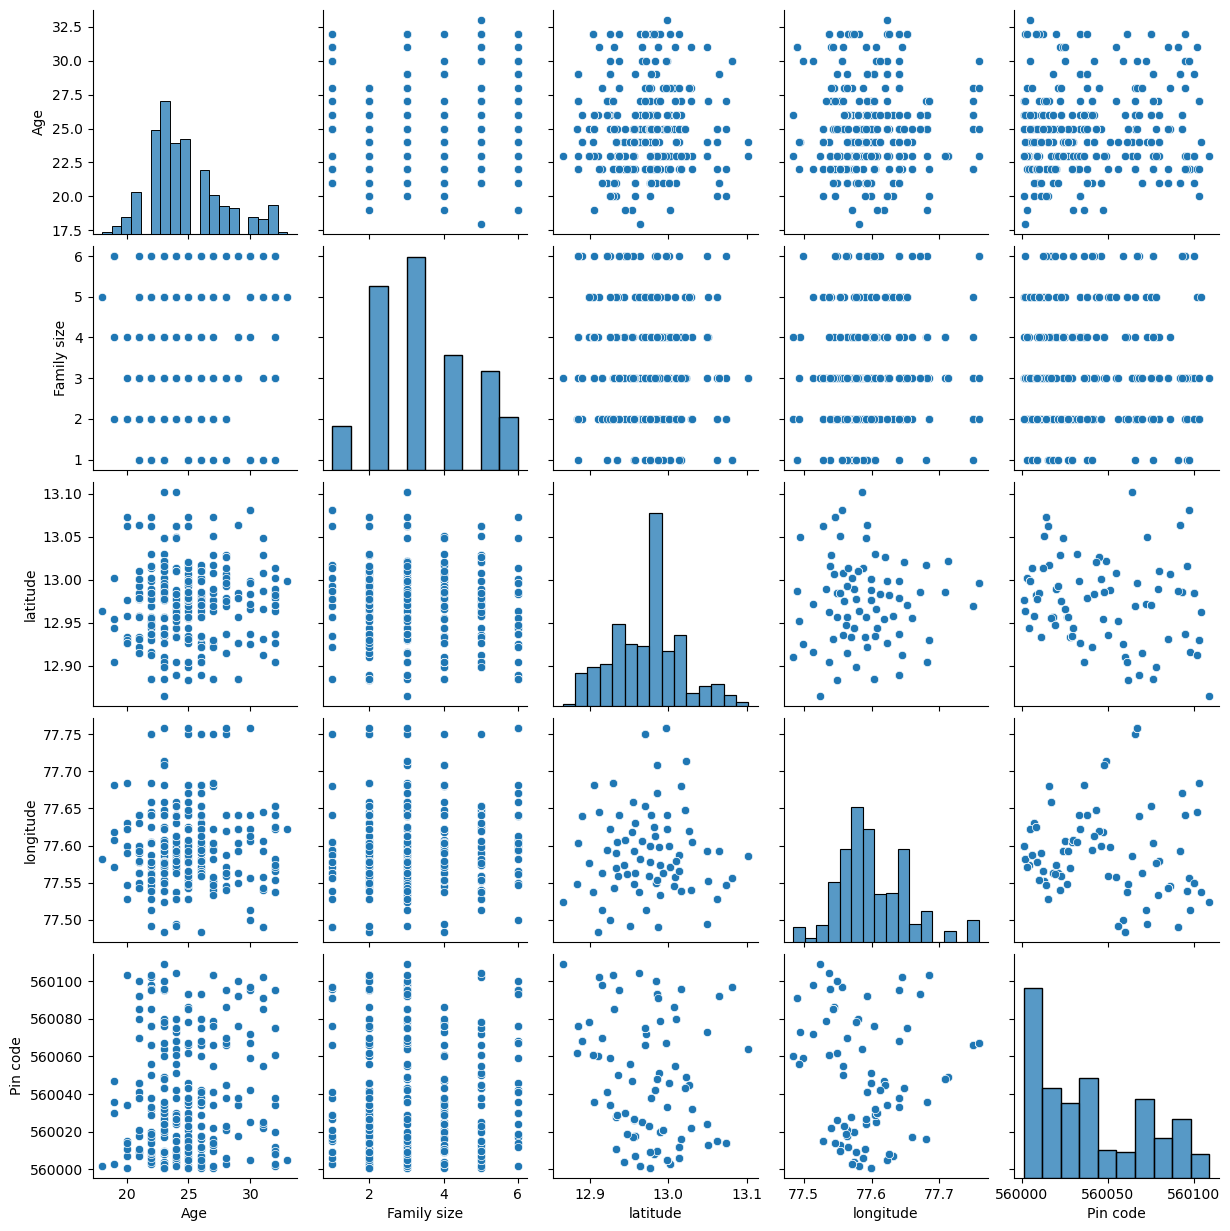

In [16]:
sns.pairplot(data=df)

### Encoding

In [17]:
le=LabelEncoder()

In [18]:
#df['Gender']=le.fit_transform(df['Gender'])
for i in char_cols:
    df[i]=le.fit_transform(df[i])

In [19]:
df["Output"].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [20]:
std=StandardScaler()
model=std.fit(df)
data=model.transform(df)

<h3> Fitting the Model <h3>

In [21]:
X=df.drop(columns='Output')
y=df['Output']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto')
# df = smote.fit_resample(X, y)

In [24]:
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)


In [25]:
y_train_sm.value_counts()

1    206
0    206
Name: Output, dtype: int64

In [26]:
scores=[]

In [27]:
# PREDICTING ON UNBIASED DATA
# model=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42,max_features=5)
# model.fit(x_train,y_train)
# pred = model.predict(x_test)
# pred
# accuracy = accuracy_score(y_test, pred)
# print(accuracy)
# scores.append(accuracy)

## DECISION TREE

In [28]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42,max_features=5)

In [29]:
model.fit(X_train_sm,y_train_sm)
pred = model.predict(x_test)
pred


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1])

In [30]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 5 17]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.83      0.23      0.36        22
           1       0.85      0.99      0.91        95

    accuracy                           0.85       117
   macro avg       0.84      0.61      0.63       117
weighted avg       0.84      0.85      0.81       117



In [31]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)
scores.append(accuracy)

0.8461538461538461


## RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_sm,y_train_sm)
y_pred=clf.predict(x_test)

In [33]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15  7]
 [ 5 90]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        22
           1       0.93      0.95      0.94        95

    accuracy                           0.90       117
   macro avg       0.84      0.81      0.83       117
weighted avg       0.89      0.90      0.90       117



In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
scores.append(accuracy)

0.8974358974358975


## SUPPORT VECTOR MACHINE 

In [35]:
SVM=SVC(kernel='rbf',C=10**10)
SVM.fit(X_train_sm, y_train_sm)

SVC(C=10000000000)

In [36]:
pred_SVM = SVM.predict(x_test)

In [37]:
print(confusion_matrix(y_test,pred_SVM))
print(classification_report(y_test,pred_SVM))


[[12 10]
 [64 31]]
              precision    recall  f1-score   support

           0       0.16      0.55      0.24        22
           1       0.76      0.33      0.46        95

    accuracy                           0.37       117
   macro avg       0.46      0.44      0.35       117
weighted avg       0.64      0.37      0.42       117



In [38]:
accuracy = accuracy_score(y_test, pred_SVM)
print(accuracy)
scores.append(accuracy)

0.36752136752136755


<h2>XGBOOST<h2>

In [39]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [40]:
XG=XGBClassifier()

In [41]:
XG.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [43]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
scores.append(accuracy)

Accuracy: 84.62%


In [44]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,y_pred))

[[ 5 17]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.83      0.23      0.36        22
           1       0.85      0.99      0.91        95

    accuracy                           0.85       117
   macro avg       0.84      0.61      0.63       117
weighted avg       0.84      0.85      0.81       117



In [45]:
scores

[0.8461538461538461,
 0.8974358974358975,
 0.36752136752136755,
 0.8461538461538461]

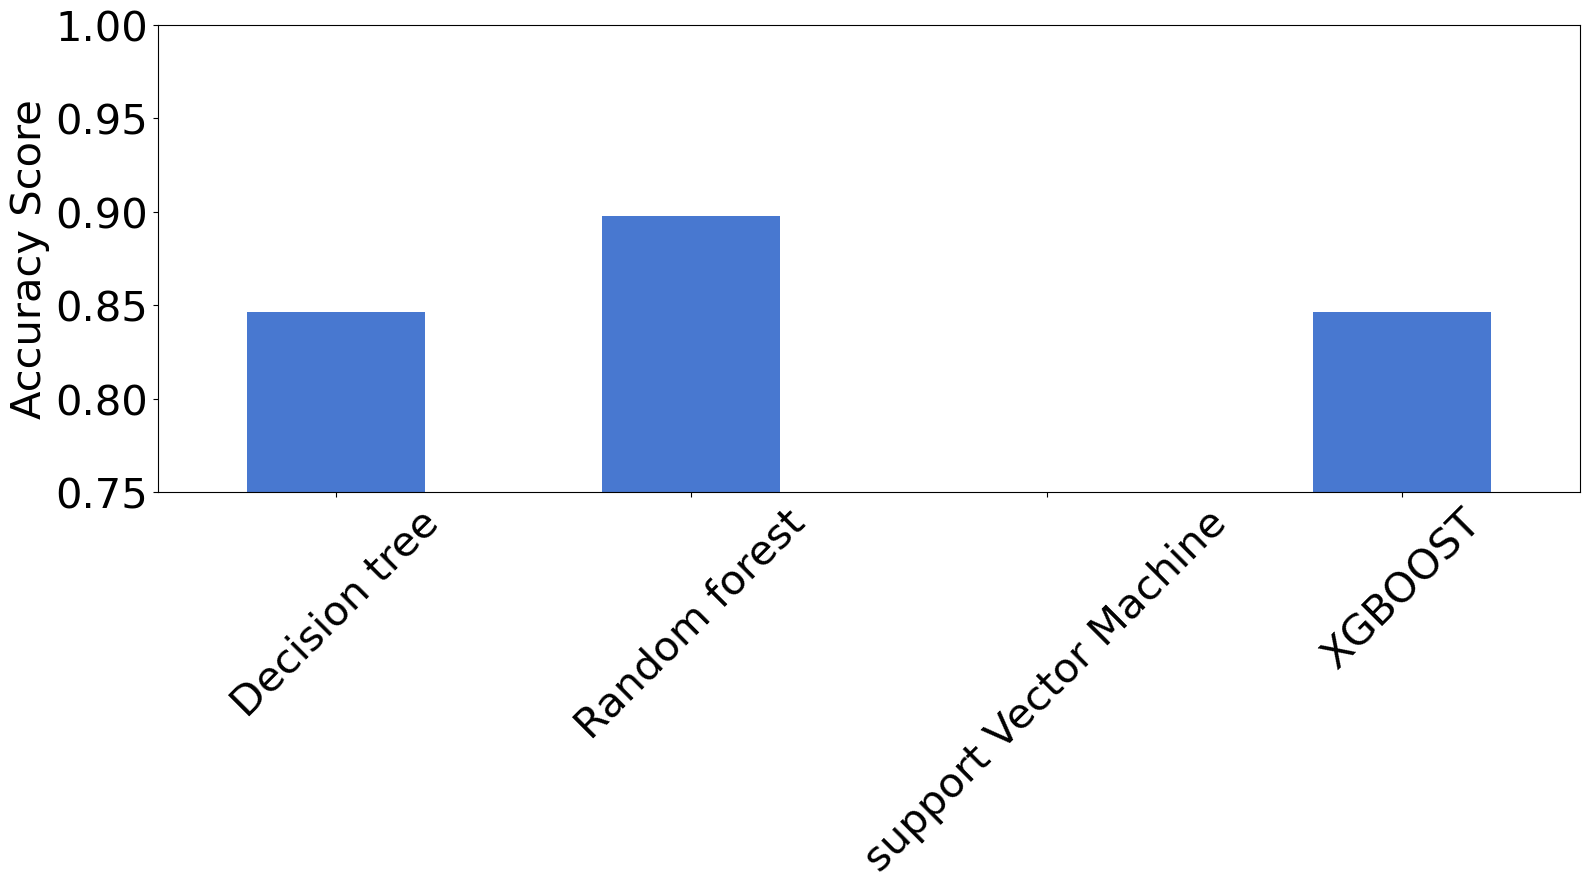

In [46]:
Acc_scores = pd.Series(scores, ['Decision tree', 'Random forest','support Vector Machine','XGBOOST'])
current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)
# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

***Random Forest Has the maximum accuracy score***

In [47]:
#Applying Stacking Techniques
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('XG',XGBClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('clf',RandomForestClassifier()))

In [48]:
# define meta learner model
level1 = RandomForestClassifier()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [49]:
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train_sm,y_train_sm)

StackingClassifier(cv=5,
                   estimators=[('XG',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learn...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()),
                               ('clf', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier())

In [50]:
yhat = model.predict(x_test)
yhat

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0])

In [51]:
accuracy = accuracy_score(y_test,yhat)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
scores.append(accuracy)

Accuracy: 89.74%
